# Multiple Regression from Scratch

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
df = pd.read_csv("student.csv")

In [12]:
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [13]:
math = df['Math'].values
read = df['Reading'].values
write = df['Writing'].values

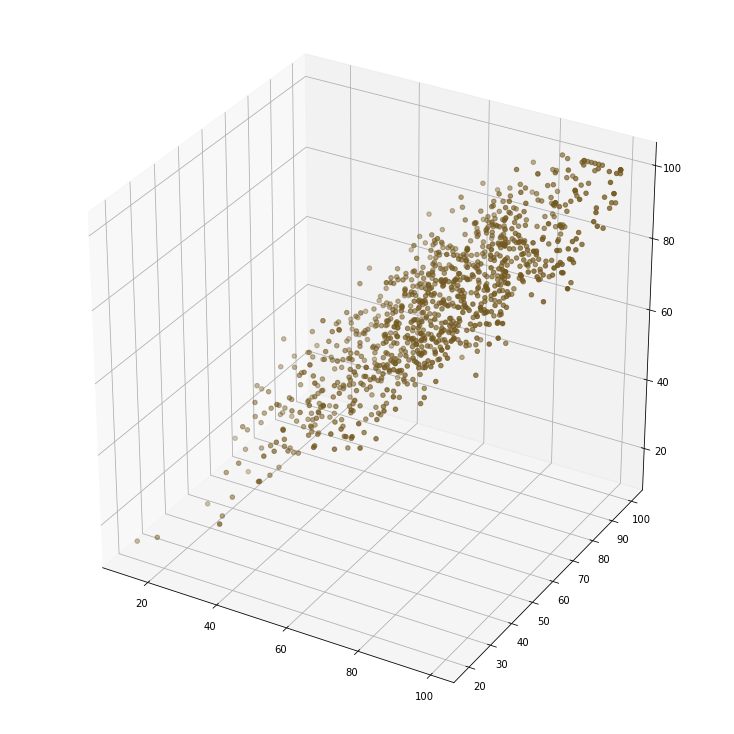

In [14]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.scatter(math, read, write, c = "#735921")
plt.show()

In [26]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
y = np.array(write)
theta = np.zeros(X.shape[1])
alpha = 0.0001

In [27]:
theta.shape, X.shape[0]

((3,), 1000)

In [28]:
def cost_function(X, y, theta):
    J = np.sum((X.dot(theta) - y)**2) / (2*m)
    return J

In [29]:
initial_cost = cost_function(X, y, theta)
print("initial cost:",initial_cost)

initial cost: 2470.11


In [56]:
def gradient_descent(X, y, theta, iterations):
    cost_history = [0]*iterations
    
    for i in range(iterations):
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss)/m
        
        theta -= alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[i] = cost
        
    return theta, cost_history
    

In [57]:
theta_new, cost_history = gradient_descent(X, y, theta, 10000)

In [58]:
theta_new

array([-0.30721672,  0.09056442,  0.899869  ])

In [59]:
print("Final Cost:",cost_history[-1])

Final Cost: 10.482515601684554


In [63]:
# Model Evaluaton -- RMSE

def rmse(y, y_pred):
    rmse = np.sqrt(sum((y-y_pred)**2)/len(y))
    return rmse

In [68]:
# Model Evaluaton -- R2 Score

def r2_score(y, y_pred):
    mean_y = np.mean(y)
    ss_tot = sum((y - mean_y)**2)
    ss_res = sum((y - y_pred)**2)
    r2 = 1 - (ss_res/ss_tot)
    return r2

In [65]:
y_pred = X.dot(theta)

In [66]:
rmse(y, y_pred)

4.578758696783347

In [69]:
r2_score(y, y_pred)

0.9096586197873936